In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus as pp
import seaborn as sns

from IPython.display import display
from IPython.display import Image

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [2]:
class CONFIG:
    INDEXS = ["R2 Pred", "R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE"]

# Load Dataset

In [3]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [4]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_1.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
29628,4913787,60,158828,9,0.0,1370.0,160.691589,110.5,187.755728,0.0,...,0,0,0,0,0,0,1,0,0,7
15404,4526533,0,111134,9,0.0,752.0,65.810811,29.0,107.484339,0.0,...,0,0,0,0,0,1,0,0,0,62
19576,6379081,0,54297,24,0.0,810.0,95.375000,39.0,133.177976,0.0,...,1,0,0,1,0,0,0,0,0,0
37805,22035,0,2310,24,0.0,37.0,7.879310,5.0,8.446745,0.0,...,1,0,0,0,0,0,0,0,1,9
26347,16272,0,311,24,0.0,32.0,6.456790,5.0,6.271726,0.0,...,0,0,0,0,0,0,1,0,0,0
10951,36820,0,599,44,0.0,7.0,1.000000,0.0,1.758098,0.0,...,1,0,0,0,0,0,0,0,1,0
35047,1169957,0,39275,18,0.0,1017.0,219.338235,195.5,158.737261,0.0,...,0,0,0,0,0,0,0,1,0,11
29051,50469,21748,2456,32,0.0,47.0,5.820312,2.5,8.418203,0.0,...,0,0,0,0,0,0,0,0,1,0
25311,367390,0,2678,100,0.0,107.0,11.753138,7.0,15.139026,0.0,...,0,0,0,0,0,0,1,0,0,2
37865,287698,0,4752,24,0.0,711.0,17.861842,10.5,57.626525,0.0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
40944,1
40945,2
40946,72
40947,28


In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

# Decision Tree

## Model Training

In [8]:
def train_model(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    return predict

In [9]:
def plot_test_predict(y_train, y_test, predict, axes=None, k=None):
    test_predict = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(predict.transpose())], axis=1)
    headers = ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("Test Predict Curve k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50)).set_title("Test Predict Curve")
    plt.show()
    sns.residplot(x=y_test.to_numpy(), y=predict, lowess=True).set_title("Residuals")
    plt.show()

## Model Evaluation

In [10]:
def evaluate(model, X_test, y_test, predict):

    # R-Squared Prediction
    r2_pred = model.score(X_test, y_test)
    
    # R-Squared
    r2 = r2_score(y_test, predict)
    
    # Explained Variance Score
    ev = explained_variance_score(y_test, predict)
    
    # Max Error
    me = max_error(y_test, predict)
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_test, predict)
    
    # Mean Squared Error
    mse = mean_squared_error(y_test, predict)
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_test, predict)
    
    return r2_pred, r2, ev, me, mean_ae, mse, median_ae

## Draw Tree

In [11]:
def draw_tree(model, X_train, y_train):
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=X_train.columns,
                                    class_names=y_train.columns,  
                                    filled=True,
                                    rounded=True,
                                    special_characters=True)
    graph = pp.graph_from_dot_data(dot_data)
    img = Image(graph.create_png())
    display(img)

## Final Model

In [12]:
def train_final_model(max_depth=None, min_samples_split=2):
    # DecisionTreeRegressor
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)

    # Model Training
    predict = train_model(model)
    plot_test_predict(y_train, y_test, predict)

    # Model Evaluation
    r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, X_test, y_test, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2_pred, r2, ev, me, mean_ae, mse, median_ae]
    })
    print(results)
    draw_tree(model, X_train, y_train)

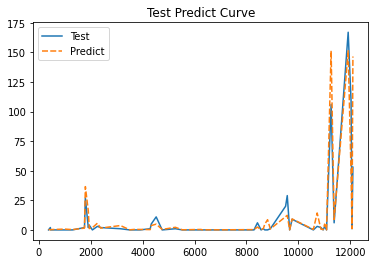

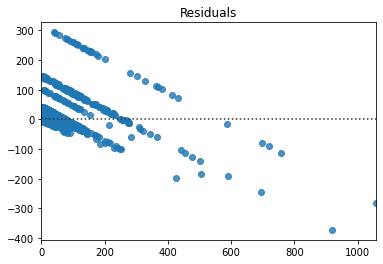

       Index        Mean
0    R2 Pred    0.481808
1         R2    0.481808
2         EV    0.481995
3         ME  768.611702
4    MEAN_AE    5.012984
5        MSE  526.217132
6  MEDIAN_AE    0.587872


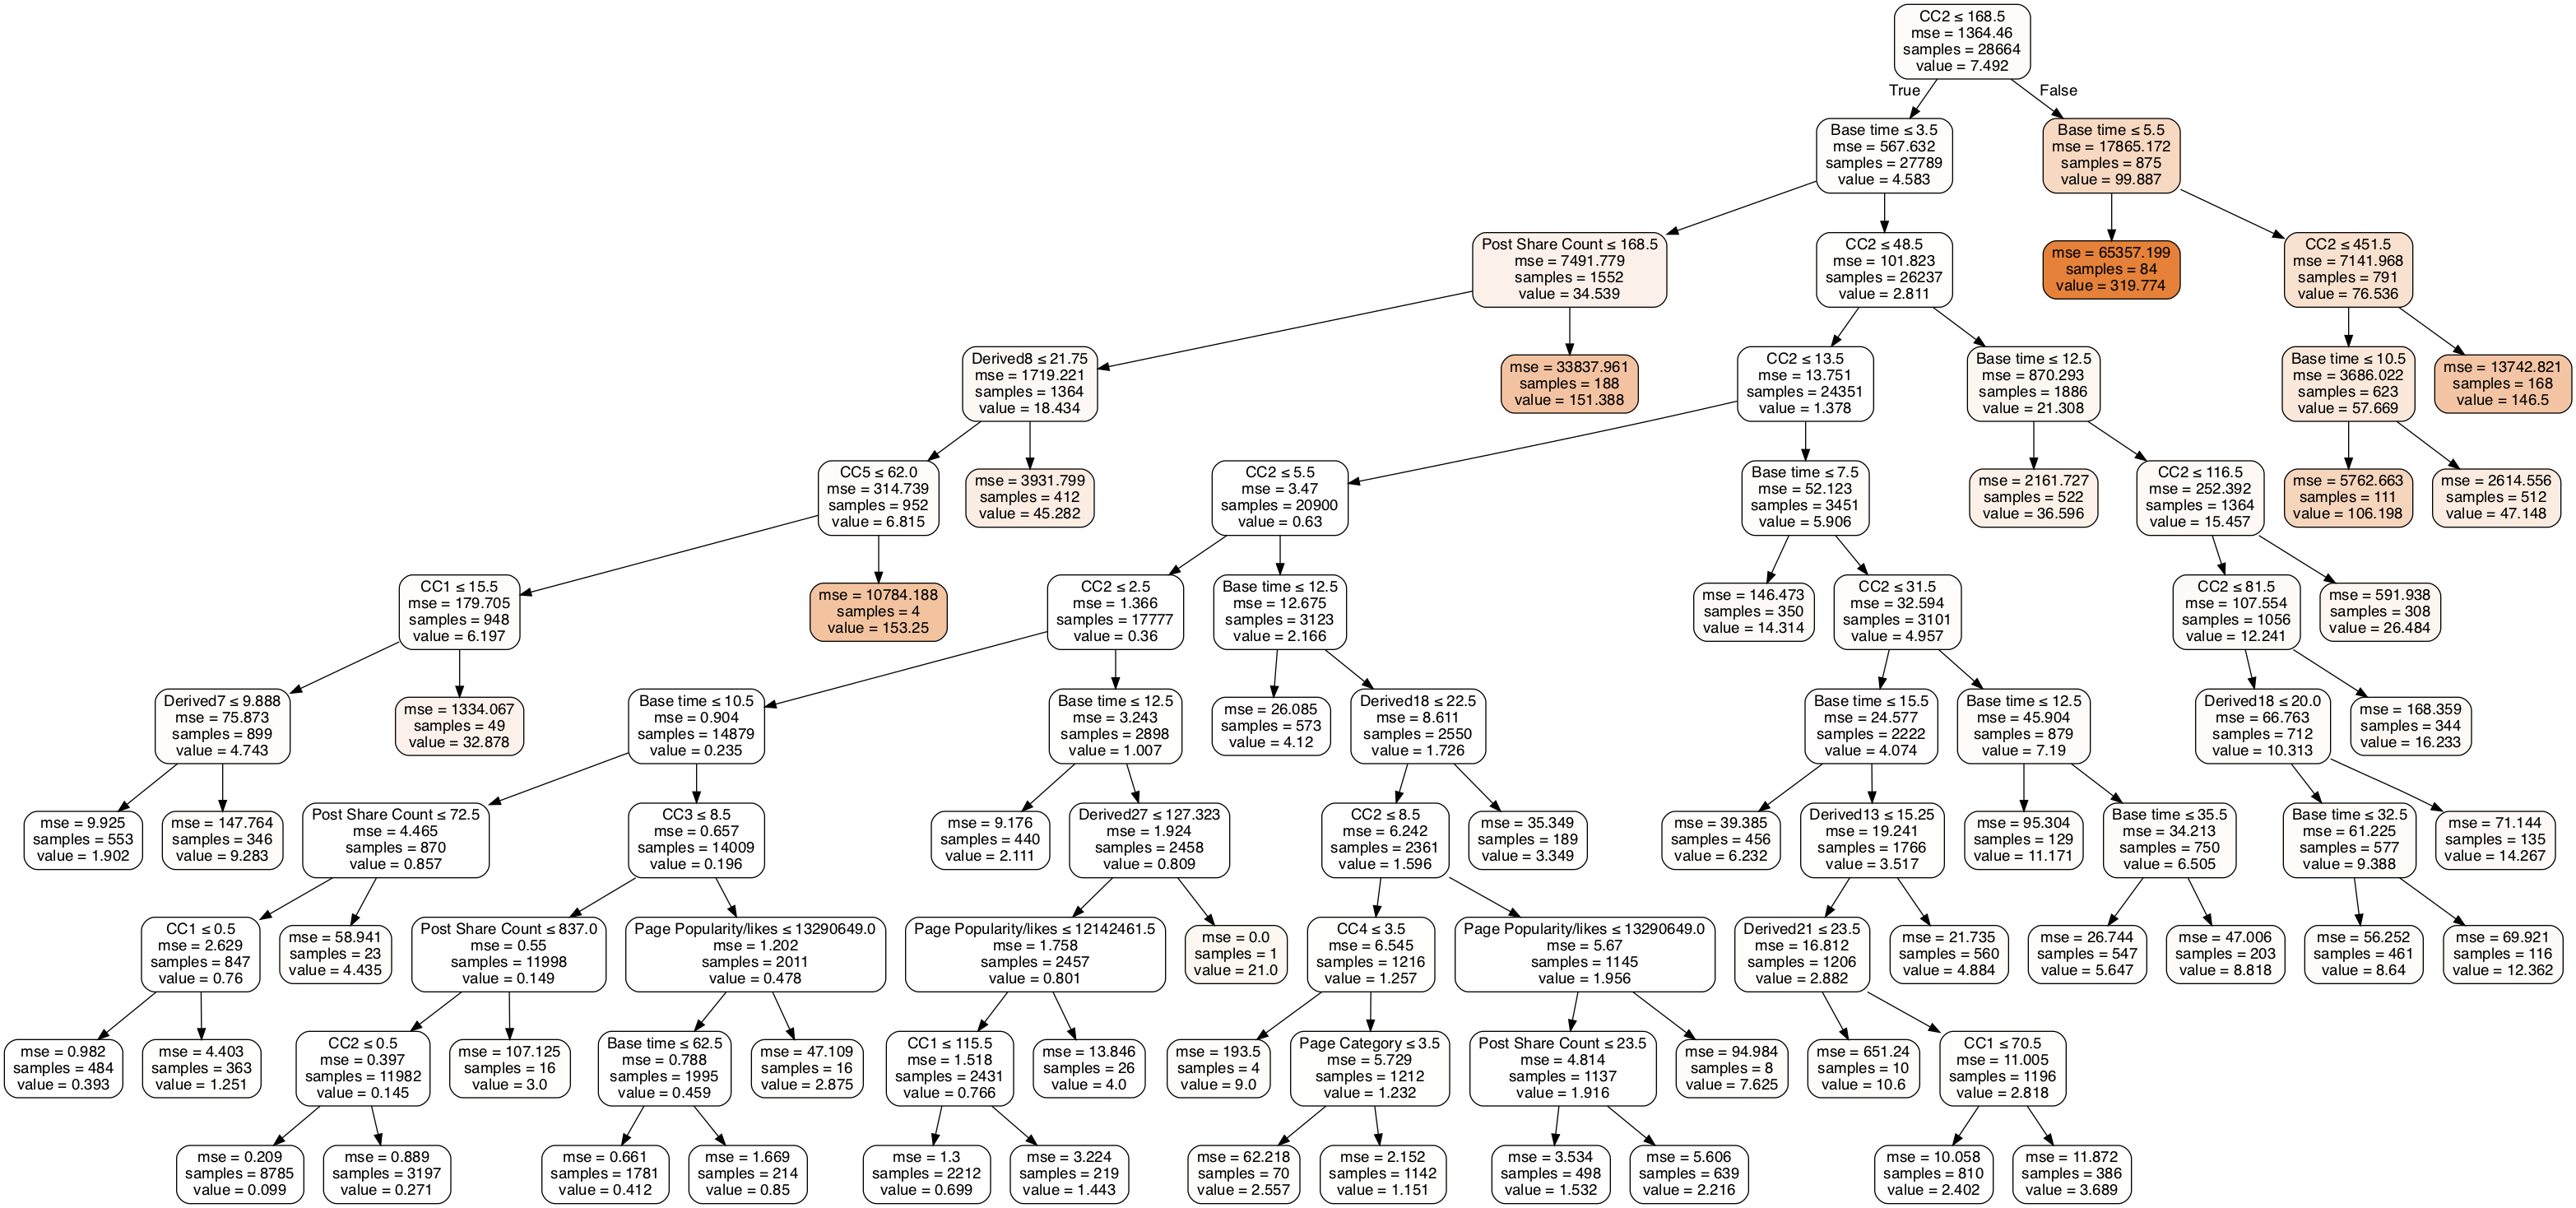

In [13]:
train_final_model(max_depth=10, min_samples_split=.02)